In [1]:
import math

def get_threshold_cos(u, ratio, min_cos):
    '''
    u: float, control the threshold
    p: float, the ratio of the gradient, last gradient divide current gradient
    min_cos: float, if the cos value is less than min_cos, retu   
    '''  
    sina2 = u**2 * (1 + ratio**2)
    if sina2 > 1:
        return min_cos
    
    cos = math.sqrt(1 - sina2)
    return cos if cos > min_cos else min_cos

In [14]:
get_threshold_cos(0.65, 1, 0.2)

0.39370039370059046

In [1]:
from test_utils import *
filter = LayerFilter(unselect_keys=['bn', 'num_batches_tracked', 'bias', 'down'])

In [2]:
def load_weight_dict_by_tag(weights_dict_dir, tag = "server", max_round = None):
    if tag is None:
        tag = "server"
    weights_dict_dir = os.path.join(weights_dict_dir,tag)
    weights_dict = {}

    lock = threading.Lock()

    def load_weight(file):
        nonlocal weights_dict
        weight_path = os.path.join(weights_dict_dir, file)
        file_split = file.split('.')[0].split('_')
        if not file_split[-2].isdigit():
            outer_round = int(file_split[-1])
            inner_round = 0
        else:
            outer_round = int(file_split[-2])
            inner_round = int(file_split[-1])
        if max_round is not None and outer_round > max_round:
            return
        weight = torch.load(weight_path)
        with lock:
            print('test:',file,weight)
            if outer_round not in weights_dict:
                weights_dict[outer_round] = {}
            weights_dict[outer_round][inner_round] = weight

    # 创建线程池
    # pool = ThreadPoolExecutor(max_workers=10, thread_name_prefix='Thread')
    # 遍历文件夹
    for file in os.listdir(weights_dict_dir):
        load_weight(file)
        # pool.submit(load_weight, file)
    # pool.shutdown(wait=True)
    for outer_round in weights_dict:
        weights_dict[outer_round] = [weights_dict[outer_round][i] for i in sorted(weights_dict[outer_round].keys())]
    return weights_dict

In [3]:
weight_dict_c0=load_weight_dict_by_tag('../out/FedThre-alexnet_cosine_0.97_0.4_4_mm_G/2024-06-30-00:28:24/grad_lists', f'c0', max_round=1)

test: c0_round_1.pt {'base.conv1.weight': tensor([[[[-3.3079e-02, -2.5558e-02, -2.9050e-02, -1.4616e-02, -8.0721e-03],
          [-1.4381e-02, -2.0895e-02, -3.0362e-02, -1.2856e-02, -4.6079e-03],
          [ 3.9585e-03, -5.8079e-03, -1.6334e-02,  5.5402e-04,  8.3752e-03],
          [ 6.0200e-03,  6.6790e-03, -1.1386e-03,  7.8347e-03,  1.4709e-02],
          [-7.1758e-03,  8.7173e-04,  3.6740e-03,  1.6190e-02,  1.8833e-02]],

         [[-6.8756e-03, -3.0508e-03, -1.6923e-02, -2.0354e-03,  1.3351e-02],
          [ 1.4403e-02,  4.0979e-03, -2.0456e-02, -2.1457e-03,  1.4872e-02],
          [ 2.6244e-02,  1.3608e-02, -9.7079e-03,  7.2504e-03,  1.9812e-02],
          [ 2.6140e-02,  2.7272e-02,  7.9654e-03,  1.3828e-02,  2.5170e-02],
          [ 1.1508e-02,  1.8133e-02,  1.0569e-02,  2.2109e-02,  2.8790e-02]],

         [[-3.3002e-02, -1.8705e-02, -3.9075e-02, -2.7655e-02, -3.8266e-03],
          [-1.0219e-02, -1.6616e-02, -4.4203e-02, -2.3779e-02,  2.8138e-03],
          [ 2.8180e-03, -6.072

In [11]:
filtered_weight_dict_c0 = filter(weight_dict_c0)

In [9]:
for k, v in weight_dict_c0[1][0].items():
    print(k, v.shape)
    # break

base.conv1.weight torch.Size([64, 3, 5, 5])
base.conv1.bias torch.Size([64])
base.bn1.weight torch.Size([64])
base.bn1.bias torch.Size([64])
base.bn1.running_mean torch.Size([64])
base.bn1.running_var torch.Size([64])
base.bn1.num_batches_tracked torch.Size([])
base.conv2.weight torch.Size([192, 64, 5, 5])
base.conv2.bias torch.Size([192])
base.bn2.weight torch.Size([192])
base.bn2.bias torch.Size([192])
base.bn2.running_mean torch.Size([192])
base.bn2.running_var torch.Size([192])
base.bn2.num_batches_tracked torch.Size([])
base.conv3.weight torch.Size([384, 192, 3, 3])
base.conv3.bias torch.Size([384])
base.bn3.weight torch.Size([384])
base.bn3.bias torch.Size([384])
base.bn3.running_mean torch.Size([384])
base.bn3.running_var torch.Size([384])
base.bn3.num_batches_tracked torch.Size([])
base.conv4.weight torch.Size([256, 384, 3, 3])
base.conv4.bias torch.Size([256])
base.bn4.weight torch.Size([256])
base.bn4.bias torch.Size([256])
base.bn4.running_mean torch.Size([256])
base.bn4.run

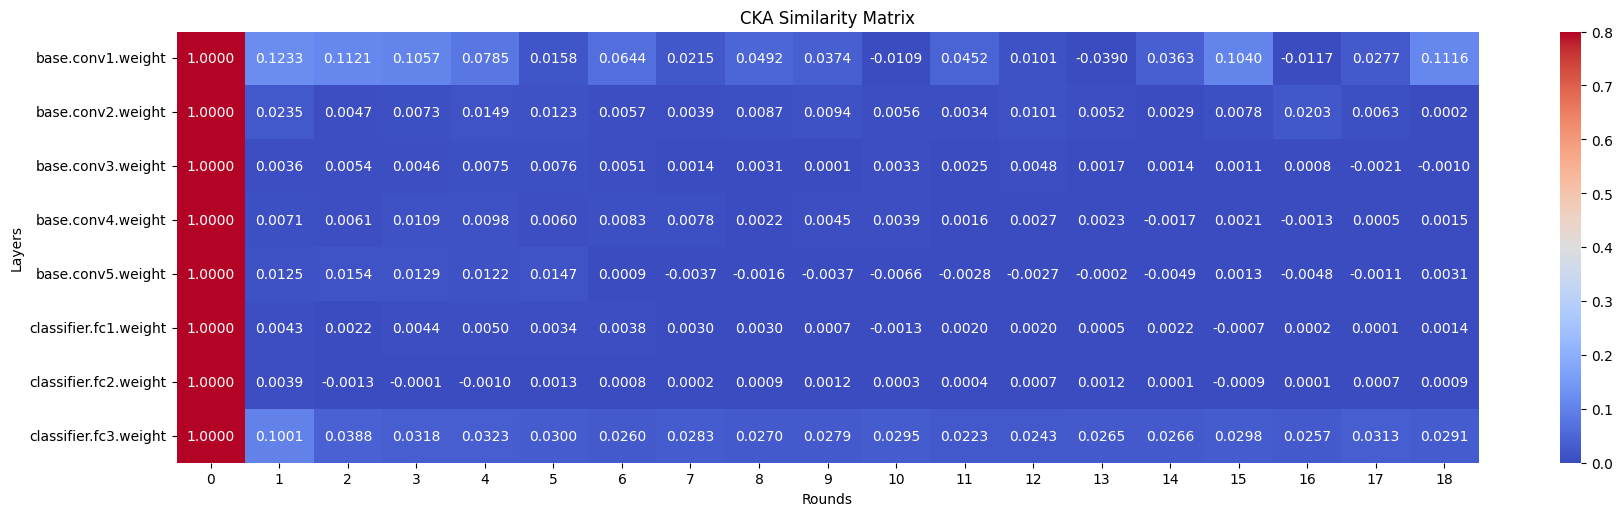

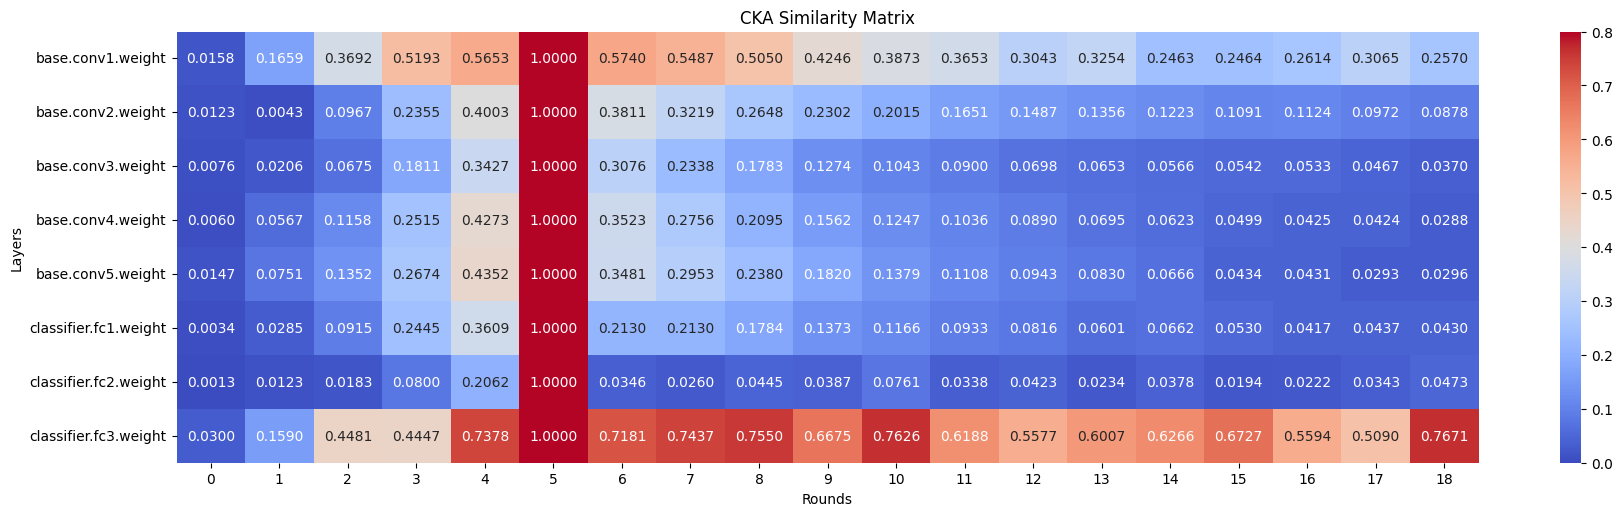

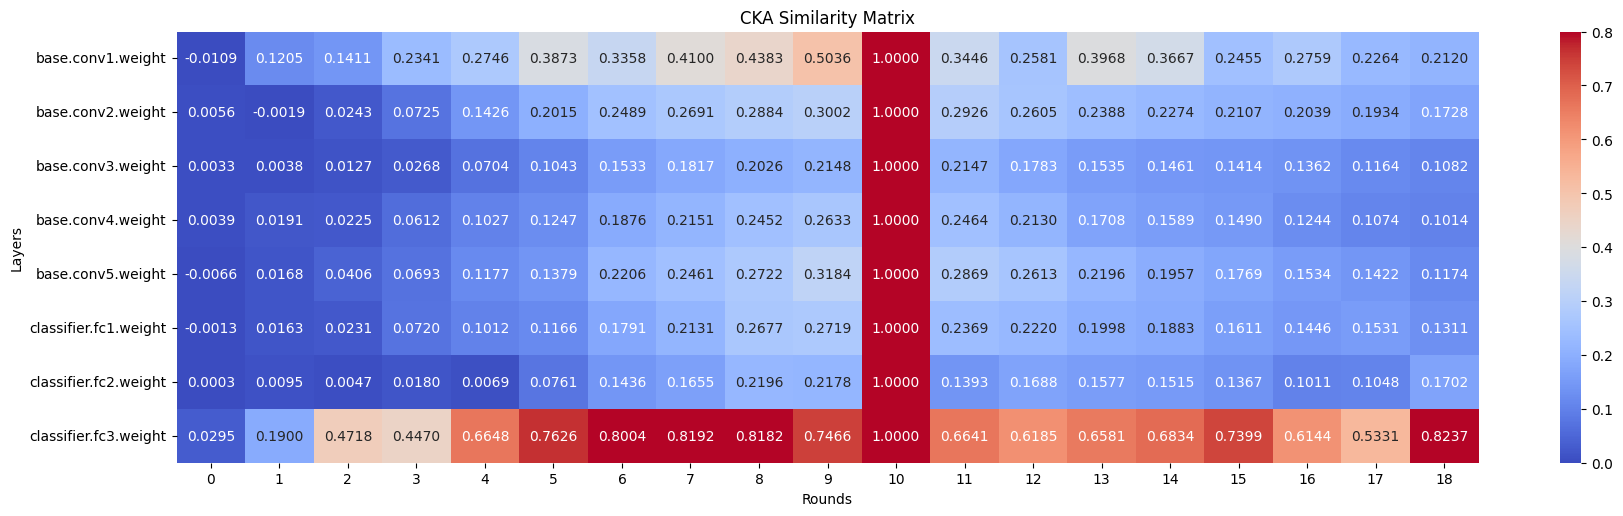

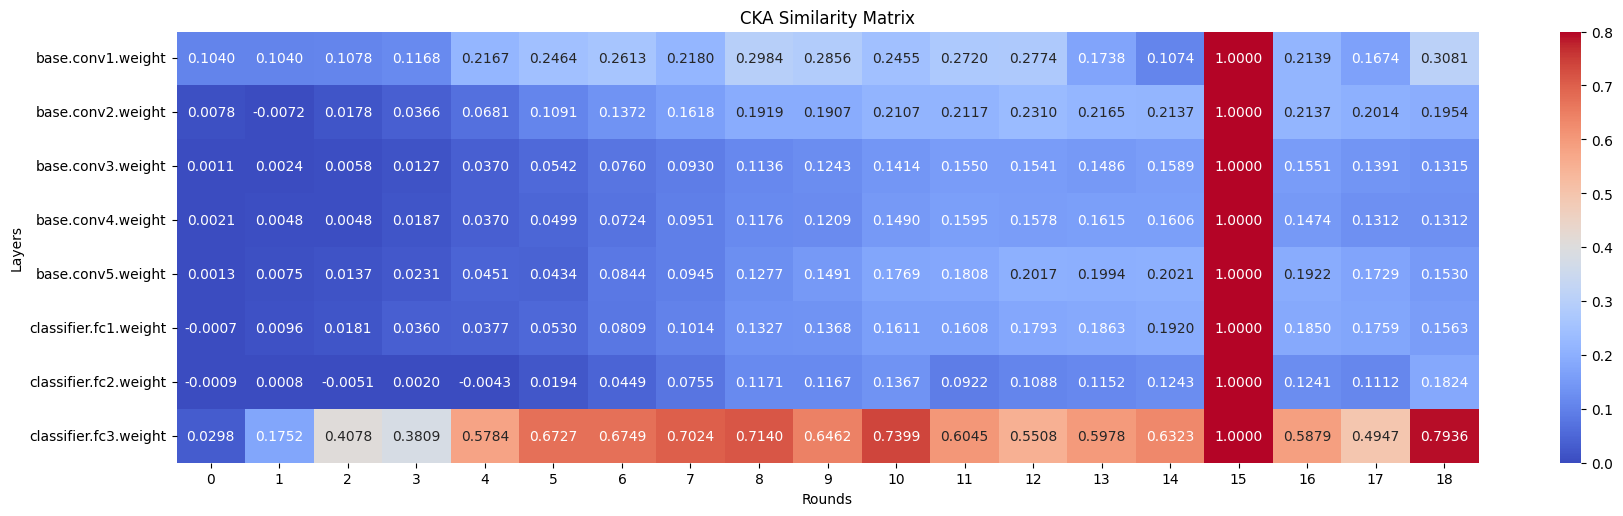

In [4]:
orgin = filtered
vmin = 0
vmax = 0.8
a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 19, save=False, show=True, cmp=0, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 19, save=False, show=True, cmp=5, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 19, save=False, show=True, cmp=10, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 19, save=False, show=True, cmp=15, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
# a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 100, save=False, show=True, cmp=20, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
# a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 100, save=False, show=True, cmp=25, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
# a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 100, save=False, show=True, cmp=30, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)
# a = cal_similar_layer_round(orgin, begin_round = 0, round_step = 100, save=False, show=True, cmp=35, cal_score_func=cos_similar, vmin=vmin, vmax=vmax)


In [8]:
filter(weight_dict_c0[17][0]).keys()
cos_similar(weight_dict_c0[17][0]['base.conv1.weight'], weight_dict_c0[10][0]['base.conv1.weight'])

tensor(0.2264, device='cuda:1')

In [ ]:
w0 = weight_dict_c0
post = 17
line = 38
layer = 'classifier.fc1.weight'
G = torch.stack([w0[post-i-1][0][layer] for i in [0,1,2,3,4]]).permute(1, 2, 0)
print(G.shape, w0[post][0][layer].shape)
x = torch.linalg.lstsq(G, w0[post][0][layer]).solution
x[x.isnan()] = 0
x[x.isinf()] = 0

In [3]:
w0[0]

NameError: name 'w0' is not defined

In [31]:
w0 = weight_dict_c0
post = 20
layer = 'classifier.fc3.bias'
# layer = 'base.conv1.weight'
sp = w0[0][0][layer].shape
if len(sp) != 1:
    G = torch.stack([w0[post-i-1][0][layer].reshape(sp[0],-1) for i in [0,1,2,3]]).permute(1, 2, 0)
    g = w0[post][0][layer].reshape(sp[0],-1)
else:
    print("bias")
    G = torch.stack([w0[post-i-1][0][layer] for i in [0,1,2,3]]).permute(1, 0).unsqueeze(0)
    g = w0[post][0][layer].unsqueeze(0)

try:
    x = torch.linalg.lstsq(G, g).solution
except torch._C._LinAlgError:
    print("Matrix is rank-deficient, applying Tikhonov regularization")
    rank = torch.linalg.matrix_rank(G)
    G[rank < 4] += 1e-9
    
# 将x中所有nan替换为0
x[torch.isnan(x)] = 0
x[torch.isinf(x)] = 0
Gx = torch.bmm(G, x.unsqueeze(-1)).squeeze(-1).reshape(sp)

res = [
cos_similar(w0[post-3][0][layer], w0[post][0][layer]),
cos_similar(w0[post-2][0][layer], w0[post][0][layer]),
cos_similar(w0[post-1][0][layer], w0[post][0][layer])]
print(res)
print(x.shape, g.shape, sp, G.shape)
print(cos_similar(Gx, w0[post][0][layer]))

bias
[tensor(0.9914, device='cuda:1'), tensor(0.9946, device='cuda:1'), tensor(0.9880, device='cuda:1')]
torch.Size([1, 4]) torch.Size([1, 10]) torch.Size([10]) torch.Size([1, 10, 4])
tensor(0.9992, device='cuda:1')


In [70]:
def cal_memory(param, set_layout=None):
    '''
    calculate the memory size of a tensor
    param: tensor
    set_layout: can be 'torch.sparse_csr', 'torch.sparse_coo', 'torch.strided'
    '''
    layout = str(param.layout)
    if set_layout is not None and layout != set_layout:
        # print('change layout from', layout, 'to', set_layout)
        if set_layout == 'torch.sparse_csr':
            param = param.to_sparse_csr()
        elif set_layout == 'torch.sparse_coo':
            param = param.to_sparse_coo()
        elif set_layout == 'torch.strided':
            param = param.to_dense()
        else:
            raise ValueError('Unsupported layout', set_layout, 'for tensor layout', layout)

    layout = str(param.layout)
    if layout == 'torch.sparse_csr':
        row = param.crow_indices().numel() * param.crow_indices().element_size()
        col = param.col_indices().numel() * param.col_indices().element_size()
        data = param.values().numel() * param.values().element_size()
        return row + col + data
    elif layout == 'torch.sparse_coo':
        indices = param.indices().numel() * param.indices().element_size()
        data = param.values().numel() * param.values().element_size()
        return indices + data
    elif layout == 'torch.strided':
        return param.numel() * param.element_size()
    else:
        raise ValueError('Unsupported layout', layout, set_layout)
        

def calculate_data_size(param, set_sparse = None, set_layout=None):
    total = 0
    sparse_filter = LayerFilter(any_select_keys=set_sparse)
    sparse_param = sparse_filter(param)
    dense_filter = LayerFilter(unselect_keys=list(sparse_param.keys()))
    dense_param = dense_filter(param)

    for k, v in dense_param.items():
        total += cal_memory(v)

    for k, v in sparse_param.items():
        print(k)
        total += cal_memory(v, set_layout)
    return total
            

In [65]:
w0.keys()

dict_keys([27, 13, 23, 8, 41, 25, 50, 43, 59, 47, 42, 37, 35, 1, 51, 18, 16, 9, 17, 55, 58, 14, 31, 57, 36, 24, 49, 45, 56, 2, 29, 32, 0, 15, 44, 48, 22, 12, 5, 19, 26, 40, 6, 60, 28, 21, 33, 3, 20, 46, 54, 7, 30, 11, 38, 34, 39, 10, 52, 4, 53])

In [67]:
t = w0[20][0]['classifier.fc2.weight']
dense_memory = cal_memory(t)
print('total:',dense_memory/1000, 'KB')

# 计算csr格式的内存占用

sparse_memory = cal_memory(t, 'torch.sparse_csr')
print('total sparse:', sparse_memory/1000, 'KB')

print('sparse compress ratio:', (1 - sparse_memory / dense_memory)*100, '%')
print(dense_memory - sparse_memory)


total: 67108.864 KB
change layout from torch.strided to torch.sparse_csr
total sparse: 645.676 KB
sparse compress ratio: 99.03786778450012 %
66463188


In [68]:
# 计算tensor中全部不为0的元素的个数
t = w0[12][0]['classifier.fc1.weight']
num = t[t != 0].numel()
# 占比
r = num / t.numel()
print('total:',num, 'ratio:', r*100, '%')

total: 35587396 ratio: 94.27440431382921 %


In [74]:
# 遍历所有层，计算参数大小
w = w0[10][0]
set_layout = 'torch.sparse_coo'
total_size = calculate_data_size(w0[10][0], ['fc2.weight', 'fc3.weight'], set_layout=set_layout)/1000
for k in w.keys():
    # k中含有fc2或fc3时，需要设置set_sparse参数
    if 'bn' not in k and 'weight' in k and 'fc2' in k or 'fc3' in k:
        size = cal_memory(w[k], set_layout=set_layout)/1000
    else:
        size = cal_memory(w[k])/1000
    print(f'{size/total_size * 100:.2f}%\t{size}\t{k}')

classifier.fc2.weight
classifier.fc3.weight
0.01%	19.2	base.conv1.weight
0.00%	0.256	base.conv1.bias
0.00%	0.256	base.bn1.weight
0.00%	0.256	base.bn1.bias
0.00%	0.256	base.bn1.running_mean
0.00%	0.256	base.bn1.running_var
0.00%	0.008	base.bn1.num_batches_tracked
0.76%	1228.8	base.conv2.weight
0.00%	0.768	base.conv2.bias
0.00%	0.768	base.bn2.weight
0.00%	0.768	base.bn2.bias
0.00%	0.768	base.bn2.running_mean
0.00%	0.768	base.bn2.running_var
0.00%	0.008	base.bn2.num_batches_tracked
1.63%	2654.208	base.conv3.weight
0.00%	1.536	base.conv3.bias
0.00%	1.536	base.bn3.weight
0.00%	1.536	base.bn3.bias
0.00%	1.536	base.bn3.running_mean
0.00%	1.536	base.bn3.running_var
0.00%	0.008	base.bn3.num_batches_tracked
2.18%	3538.944	base.conv4.weight
0.00%	1.024	base.conv4.bias
0.00%	1.024	base.bn4.weight
0.00%	1.024	base.bn4.bias
0.00%	1.024	base.bn4.running_mean
0.00%	1.024	base.bn4.running_var
0.00%	0.008	base.bn4.num_batches_tracked
1.45%	2359.296	base.conv5.weight
0.00%	1.024	base.conv5.bias
0.00%	1.0

In [75]:
w = filter(w0[20][0])
set_layout = 'torch.sparse_csr'
total_size = calculate_data_size(w0[10][0], ['fc2.weight', 'fc3.weight'], set_layout=set_layout)/1000
for k in w.keys():
    # k中含有fc2或fc3时，需要设置set_sparse参数
    if 'bn' not in k and 'weight' in k and 'fc2' in k or 'fc3' in k:
        size = cal_memory(w[k], set_layout=set_layout)/1000
    else:
        size = cal_memory(w[k])/1000
    print(f'{size/total_size * 100:.2f}%\t{size}\t{k}')

classifier.fc2.weight
classifier.fc3.weight
0.01%	19.2	base.conv1.weight
0.76%	1228.8	base.conv2.weight
1.64%	2654.208	base.conv3.weight
2.19%	3538.944	base.conv4.weight
1.46%	2359.296	base.conv5.weight
93.24%	150994.944	classifier.fc1.weight
0.40%	645.676	classifier.fc2.weight
0.00%	1.576	classifier.fc3.weight
